# Partie "Problem Solving"


## Vacance et bagage

Vous allez en vacances et vous avez un nombre d'objets à prendre avec vous, cependant, il n'y pas assez d'éspace pour tout prendre dans votre voiture.
Vous essayez donc d'assigner un nombre à chaque objet représentant son importance tout en lui assignant un nombre representant l'espace qu'il va prendre dans la voiture. Déterminez les objets à inclure afin que vous ne dépassiez pas la limite d'espace dans la voiture et que l'importance totale des objets inclues soit la plus élevée possible.
Créer une fonction take_objects(obj_importance, obj_sizes, car_space) où:
obj_sizes de taille nobjets représente les poids de chaque objet.
obj_importance de taille nobjets représente l'importance de chaque objet.
car_space est l'espace totale disponible dans la voiture.
Essayer de trouver une solution avec la meilleure complexité possible.



In [1]:
def take_objects(obj_importance:list[int], obj_sizes:list[int],car_space:int) -> list[int]:
  if(len(obj_importance)!=len(obj_sizes)):
    raise ValueError("obj_importance and obj_sizes must have the same length")
  n = len(obj_importance)
  dp = [[0 for _ in range(car_space+1)] for _ in range(n+1)]
  # Remplir le tableau dp
  for i in range(1, n + 1):
      for w in range(car_space + 1):
          if obj_sizes[i-1] <= w:
              dp[i][w] = max(dp[i-1][w], dp[i-1][w - obj_sizes[i-1]] + obj_importance[i-1])
          else:
              dp[i][w] = dp[i-1][w]

  # Retrouver les objets pris
  w = car_space
  taken_objects = []
  for i in range(n, 0, -1):
      if dp[i][w] != dp[i-1][w]:
          taken_objects.append(i-1)
          w -= obj_sizes[i-1]

  return taken_objects[::-1]


In [2]:
obj_importance = [10, 40, 30, 50]
obj_sizes = [5, 4, 6, 3]
car_space = 10
take_objects(obj_importance, obj_sizes, car_space)


[1, 3]

In [3]:
def read_test_cases(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    test_cases = []
    for i in range(0, len(lines), 5):  # Assuming each test case has 5 lines (including blank lines)
        obj_importance = list(map(int, lines[i].strip().split()))
        obj_sizes = list(map(int, lines[i+1].strip().split()))
        car_space = int(lines[i+2].strip())

        # Process expected result (handle multiple solutions and empty lists)
        expected_result_line = lines[i+3].strip()
        if "Expected output is empty" in expected_result_line:
            expected_result = [[]]  # Expecting an empty list
        else:
            expected_result = [list(map(int, sol.strip().split())) for sol in expected_result_line.split('|')]

        test_cases.append((obj_importance, obj_sizes, car_space, expected_result))

    return test_cases

In [4]:
def evaluate_function(function, test_cases):
    total_tests = len(test_cases)
    passed_tests = 0
    failed_tests = []

    for index, (obj_importance, obj_sizes, car_space, expected_results) in enumerate(test_cases):
        result = function(obj_importance, obj_sizes, car_space)

        # Check if the result matches any of the expected results
        if any(sorted(result) == sorted(expected) for expected in expected_results):
            passed_tests += 1
        else:
            failed_tests.append((index, result, expected_results))

    # Report results
    if passed_tests == total_tests:
        print(f"\033[92mCorrect Answer! Test passed {passed_tests}/{total_tests}\033[0m")
    else:
        print(f"\033[91mWrong Answer! Test passed {passed_tests}/{total_tests}\033[0m")
        
    if failed_tests:
        print("\nFailed Test Cases:")
        for index, result, expected_results in failed_tests:
            print(f"Test case {index + 1}:")
            print(f"  Got: {result}")
            print(f"  Expected: {expected_results}")

In [5]:
# Load test cases
test_cases = read_test_cases("Testcase/vac_bag.txt")

# Evaluate the function
evaluate_function(take_objects, test_cases)

Correct Answer! Test passed 28/28


## Fusionner plusieurs listes triées

Pendant le cours, on vous a montré comment fusionner deux listes triées en une seule liste triée. Ici, on vous demande de faire la même chose, mais avec un nombre quelconque de listes triées.
Étant donné un tableau "lists" contenant k listes, chaque liste est triée par ordre croissant. Fusionnez toutes les listes chaînées en une seule liste chaînée triée en ordre croissant et renvoyez-la.
Attention, il y a un moyen de faire ça en O(nlog(k)) où n est la taille totale des listes et k est le nombre de listes. Donner la solution la plus optimale possible

In [6]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [7]:
import heapq
def mergeKLists(lists):

    heap = []
        
    # Add the head of each list to the heap (only non-empty lists)
    for i, l in enumerate(lists):
        if l:
            heapq.heappush(heap, (l.val, i, l))
        
    # Dummy node to help build the merged linked list
    dummy = ListNode()
    current = dummy
        
    # Extract the smallest element from the heap, and advance that list
    while heap:
        # Pop the smallest element (based on node's value)
        val, i, node = heapq.heappop(heap)
            
        # Add the smallest node to the result list
        current.next = node
        current = current.next
            
        # If there is a next node in the list, add it to the heap
        if node.next:
            heapq.heappush(heap, (node.next.val, i, node.next))
        
    # Return the merged linked list, starting from dummy's next node
    return dummy.next

In [8]:
l1 = ListNode(1, ListNode(4, ListNode(5)))
l2 = ListNode(1, ListNode(3, ListNode(4)))
l3 = ListNode(2, ListNode(6))

merged_list = mergeKLists([l1, l2, l3])

# Function to print the merged linked list
def print_list(node):
    while node:
        print(node.val, end=" -> " if node.next else "")
        node = node.next
    print()

# Print the merged list
print_list(merged_list)

1 -> 1 -> 2 -> 3 -> 4 -> 4 -> 5 -> 6


## Permutation

Étant donné un tableau nums d'entiers distincts, retourner toutes les permutations possibles. Vous pouvez retourner la réponse dans n'importe quel ordre. Par exemple:

In [9]:
def permute(nums: list[int]) -> list[list[int]]:
  result = []

  def permute_rec(nums, current_index, result):
    if current_index == len(nums) - 1:
      result.append(nums.copy())
      return

    for index in range(current_index, len(nums)):
      nums[current_index], nums[index] = nums[index], nums[current_index]
      permute_rec(nums, current_index + 1, result)
      nums[current_index], nums[index] = nums[index], nums[current_index]

  permute_rec(nums, 0, result)
  return result

In [11]:
import time
# Test the performance
test_input = list(range(10))  # a list from 1 to 9
start_time = time.time()
result = permute(test_input)
end_time = time.time()

# Print the time in milliseconds
print(f"a list of size {len(test_input)} Generate {len(result)} different permutation \nTime taken: {(end_time - start_time) * 1000:.2f} ms")

a list of size 10 Generate 3628800 different permutation 
Time taken: 6564.17 ms


## Carrés latins

In [12]:
def generate_combinations(n):
    # Fonction récursive pour générer toutes les combinaisons croissantes
    def recursive_combinations(current_combination, level, start):
        if level == n:  # Si la combinaison atteint la longueur n
            combinations.append(current_combination[:])  # Ajouter une copie de la combinaison
            return
        
        for i in range(start, n+1):  # Toujours aller de start à n pour éviter les permutations
            current_combination[level] = i
            recursive_combinations(current_combination, level + 1, i)  # Ne pas revenir en arrière

    combinations = []
    current_combination = [0] * n  # Initialiser une combinaison vide de taille n
    recursive_combinations(current_combination, 0, 1)
    return combinations


def find_combinations_with_trace(n, target_trace):
    # Générer toutes les combinaisons croissantes de {1, 1, ..., 1} à {n, n, ..., n}
    all_combinations = generate_combinations(n)
    
    # Filtrer les combinaisons dont la somme des éléments diagonaux (la trace) correspond à target_trace
    valid_combinations = []
    for comb in all_combinations:
        trace = sum(comb[i] for i in range(n))  # Calcul de la trace (somme des diagonales)
        if trace == target_trace:
            valid_combinations.append(comb)
    
    return valid_combinations

def initialize_matrix(n):
    i=0
    return [[0 for i in range(n)] for i in range(n)]


def fill_diagonal_with_combination(matrix, combination):
    # Remplir les éléments diagonaux de la matrice avec une combinaison donnée
    n = len(matrix)
    for i in range(n):
        matrix[i][i] = combination[i]  # Affecter chaque élément de la combinaison à la diagonale


def is_safe(matrix, row, col, num, n):
    # Vérifie si num peut être placé dans matrix[row][col] sans redondance dans la ligne et la colonne
    for i in range(n):
        if matrix[row][i] == num or matrix[i][col] == num:
            return False
    return True


def solve_latin_square(matrix, n, row=0, col=0):
    # Si nous avons rempli la dernière colonne, passer à la prochaine ligne
    if col == n:
        col = 0
        row += 1
        if row == n:
            return True  # Matrice remplie sans conflit

    # Si l'élément est déjà rempli (appartenant à la diagonale), passer à la prochaine case
    if matrix[row][col] != 0:
        return solve_latin_square(matrix, n, row, col + 1)

    # Essayer d'affecter chaque nombre possible de 1 à n dans la case actuelle
    for num in range(1, n + 1):
        if is_safe(matrix, row, col, num, n):
            matrix[row][col] = num  # Tenter d'affecter num

            # Continuer avec les prochaines cases
            if solve_latin_square(matrix, n, row, col + 1):
                return True

            # Si cela cause un conflit, réinitialiser la case (backtracking)
            matrix[row][col] = 0

    return False  # Pas de solution possible pour cette configuration


def generate_latin_square(n, target_trace):
    # Étape 1: Générer toutes les combinaisons possibles avec la trace
    valid_combinations = find_combinations_with_trace(n, target_trace)
    
    # Étape 2: Pour chaque combinaison, remplir la diagonale et compléter la matrice
    for combination in valid_combinations:
        # Initialiser la matrice avec des zéros
        matrix = initialize_matrix(n)

        # Remplir la diagonale avec la combinaison actuelle
        fill_diagonal_with_combination(matrix, combination)

        # Étape 3: Compléter le reste de la matrice en respectant la non-redondance
        if solve_latin_square(matrix, n):
            print("Solution trouvée avec la combinaison : ", combination)
            for row in matrix:
                print(row)
            print("\n")
        else:
            print("Impossible de compléter la matrice avec la combinaison : ", combination)

In [13]:
n = 3
target_trace = 6
generate_latin_square(n, target_trace)

Solution trouvée avec la combinaison :  [1, 2, 3]
[1, 3, 2]
[3, 2, 1]
[2, 1, 3]


Solution trouvée avec la combinaison :  [2, 2, 2]
[2, 1, 3]
[3, 2, 1]
[1, 3, 2]




# **Partie 2 "Calcul Scientifique"**

In [24]:
from sklearn.datasets import make_moons, make_circles, make_blobs
import numpy as np
from matplotlib import pyplot as plt

In [25]:
datasets = [
make_moons(noise=0.3, random_state=0),
make_circles(noise=0.2, factor=0.5, random_state=1),
make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

## **NumPy: Régression Logistique**

In [26]:
class LogisticRegression:
    """
    Classe pour implémenter la régression logistique avec deux méthodes d'optimisation : descente de gradient et méthode de Newton.
    """
    def __init__(self, max_iterations=1000, learning_rate=0.01, optimization_method='gradient_descent'):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.weights = None
        self.bias = 0
        self.losses = []
        self.accuracies = []

    def sigmoid(self, x):
        """
        Calcule la fonction sigmoïde pour une valeur ou un tableau donné.
        """
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        """
        Entraîne le modèle en utilisant les données d'entrée X et les étiquettes y.
        La méthode d'optimisation choisie est utilisée.
        """
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        if self.optimization_method == 'gradient_descent':
            self.gradient_descent(X, y)
        elif self.optimization_method == 'Newton':
            self.Newton_method(X, y)
        else:
            raise ValueError("Méthode d'optimisation non reconnue : choisissez 'gradient_descent' ou 'Newton'.")

    def gradient_descent(self, X, y):
        """
        Effectue l'optimisation des poids et du biais en utilisant la méthode de descente de gradient.
        """
        for i in range(self.max_iterations):
            # Calcul des prédictions
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Calcul de l'erreur
            error = predictions - y

            # Mise à jour des poids et du biais
            gradient_w = np.dot(X.T, error) / len(y)
            gradient_b = np.sum(error) / len(y)
            self.weights -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b

            # Calcul de la perte
            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.losses.append(loss)

    def Newton_method(self, X, y):
        """
        Effectue l'optimisation des poids et du biais en utilisant la méthode de Newton.
        """
        for i in range(self.max_iterations):
            # Calcul des prédictions
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Calcul des gradients et de la matrice Hessienne
            gradient_w = np.dot(X.T, predictions - y) / len(y)
            gradient_b = np.sum(predictions - y) / len(y)

            diag = predictions * (1 - predictions)
            hessian = np.dot(X.T, X * diag[:, np.newaxis]) / len(y)

            # Mise à jour des poids et du biais
            self.weights -= np.linalg.solve(hessian, gradient_w)
            self.bias -= gradient_b

            # Calcul de la perte
            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.losses.append(loss)

    def predict(self, X):
        """
        Prend en entrée une ou plusieurs données et retourne les prédictions correspondantes.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_model)
        return (probabilities >= 0.5).astype(int)


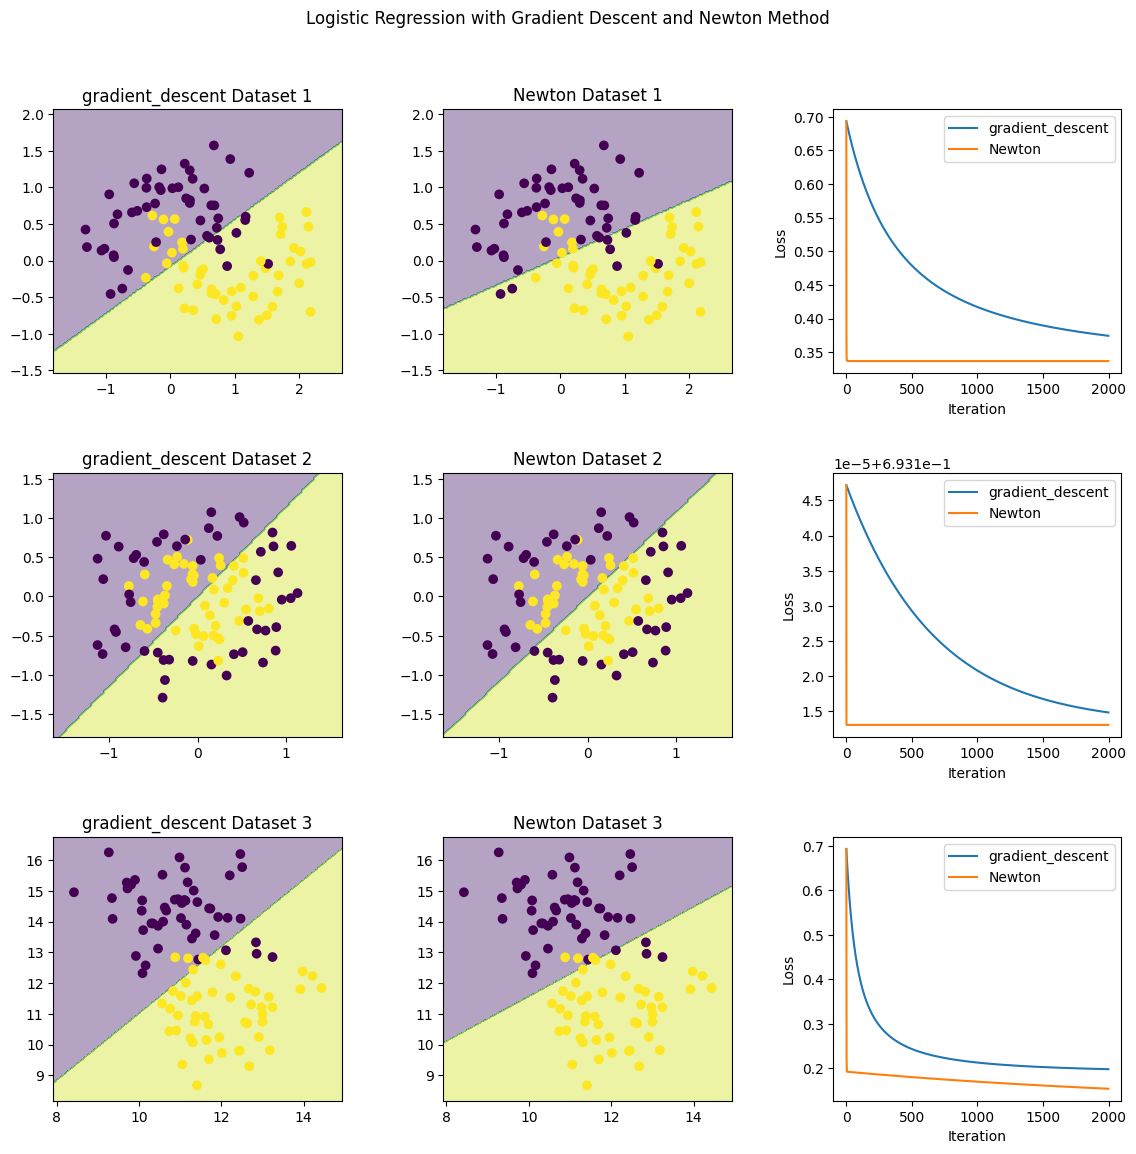

In [32]:
methods = ['gradient_descent', 'Newton']
fig, axs = plt.subplots(len(datasets), 3, figsize=(12, 12))
# For each dataset
for i, data in enumerate(datasets):
    X, y = data
    # For each method
    for j, method in enumerate(methods):
        # Initialize your Logistic Regression model with n_iterations and optimizer
        model = LogisticRegression(max_iterations=2000, optimization_method=method)
        # Fit the model to the data
        model.fit(X, y)
        # Predict the labels
        y_pred = model.predict(X)
        #plot the decision boundaries
        x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))
        Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        axs[i][j].contourf(xx1, xx2, Z, alpha=0.4)
        axs[i][j].set_xlim(xx1.min(), xx1.max())
        axs[i][j].set_ylim(xx2.min(), xx2.max())

        # Plot decision boundaries and color points by model predictions
        axs[i][j].scatter(X[:, 0], X[:, 1], c=y)
        axs[i][j].set_title(method + ' Dataset ' + str(i+1))

        # Plot the loss of both methods for each dataset in the last column
        if j == 0:
                axs[i][2].plot(model.losses, label=f'{method}')
                axs[i][2].set_xlabel('Iteration')
                axs[i][2].set_ylabel('Loss')
                axs[i][2].legend()
        if j == 1:
                axs[i][2].plot(model.losses, label=f'{method}')
                axs[i][2].set_xlabel('Iteration')
                axs[i][2].set_ylabel('Loss')
                axs[i][2].legend()

fig.suptitle('Logistic Regression with Gradient Descent and Newton Method')
fig.tight_layout(pad=3.0)
plt.show()